<a href="https://colab.research.google.com/github/lookmeebbear/GeoProg_MIST2024/blob/main/PRISMA_OpenandClassy_Lookmee_MIST2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 32.6 MB/s eta 0:00:00


open image and check info

In [ ]:
import rasterio as rio

In [ ]:
linzy = rio.open('/content/prisma_talumpuk4326.tif')
type(linzy)

rasterio.io.DatasetReader

In [ ]:
img = linzy.read()
type(img)

numpy.ndarray

In [ ]:
linzy.count, linzy.width, linzy.height

((549, 419), 234, 419, 549)

In [ ]:
linzy.read(1)

array([[    0,     0,  3583, ...,     0,     0,     0],
       [    0,     0,  3887, ...,     1,     1,     1],
       [    0,     0,  3750, ...,     1,     1,     1],
       ...,
       [11535, 13074, 12752, ...,     1,     0,     0],
       [14227, 16186, 16414, ...,     1,     0,     0],
       [    0,     0,     0, ...,     1,     0,     0]], dtype=uint16)

In [ ]:
img[0]

array([[    0,     0,  3583, ...,     0,     0,     0],
       [    0,     0,  3887, ...,     1,     1,     1],
       [    0,     0,  3750, ...,     1,     1,     1],
       ...,
       [11535, 13074, 12752, ...,     1,     0,     0],
       [14227, 16186, 16414, ...,     1,     0,     0],
       [    0,     0,     0, ...,     1,     0,     0]], dtype=uint16)

In [ ]:
linzy.bounds

BoundingBox(left=100.10213883381579, bottom=8.37714064925763, right=100.21599530897015, top=8.52632252243124)

In [ ]:
linzy.transform

Affine(0.0002717338309173243, 0.0, 100.10213883381579,
       0.0, -0.0002717338309173243, 8.52632252243124)

In [ ]:
# [lat lon] = A*[row, col]  lower right corner
linzy.transform*(419, 549)

(100.21599530897015, 8.37714064925763)

In [ ]:
testb = linzy.read(1)
x = 100.15
y = 8.40

print( linzy.index(x,y) )

print( testb[ linzy.index(x,y) ] )

for val in linzy.sample( [(x,y)] ): print(val)

(464, 176)
44289
[44289 42095 42310 43452 43538 43444 44737 44938 45394 46253 46103 45619
 46130 45947 46806 45606 46535 47449 46918 47055 46500 46956 48492 48168
 47525 49035 48178 47746 48459 48836 48108 47186 48528 48017 48195 49023
 50221 48254 45762 52397 52643 49616 49212 57582 50316 50500 49658 47233
 51382 53053 51244 50409 49546 49458 47315 44761 46457 44622 32244 46897
 51870 53336 50582 40785 43197 44610 50669 49995 51629 50717 50252 49871
 49372 49853 51097 52190 52472 51914 52918 51986 49962 38202 46473 45707
 44869 49389 47827 47929 49228 49981 50676 49992 50086 52521 56423 56045
 52021 50399 48507 47917 45073 47302 33881   228   355   278   330   138
   319   681   833  1851 22760 19257 20824 24118 25192 27034 28523 28887
 29690 30804 32128 33525 34560 35211 35691 35851 35848 36213 36322 36852
 37068 37402 37538 37736 37965 38581 38487 37925 36622 36461 35517 34823
 35588 36445  2963  1064   538   298   490   283   273   184   248   269
   194   179   260   250   270   4

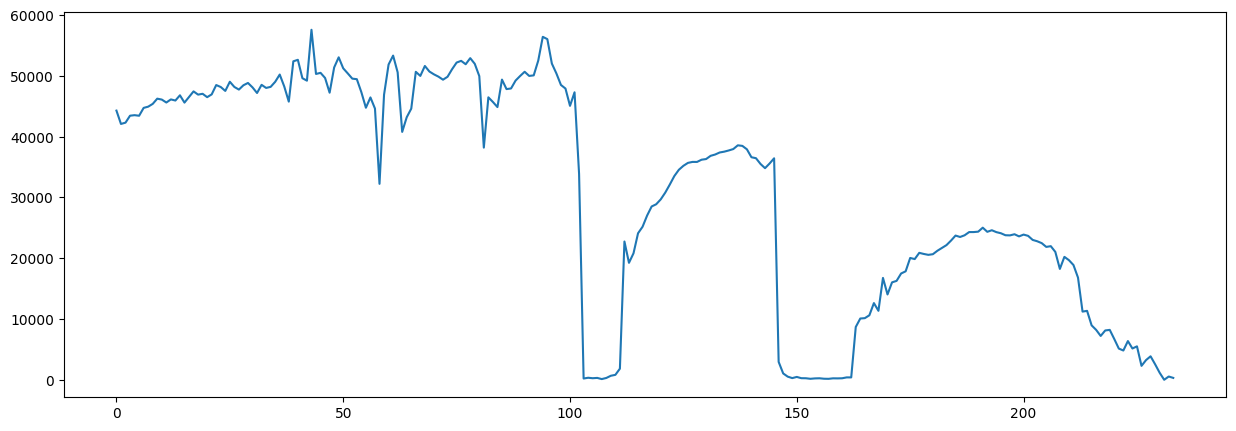

In [ ]:
import matplotlib.pyplot as plt
myval = val
fig, ax = plt.subplots(1,1, figsize=(15,5))
plt.plot( myval )

In [ ]:
import numpy as np
x = np.linspace(0,9,10)
y = np.linspace(10,19,5)
print(x)
print(y)
print('-----------------------------')
X,Y = np.meshgrid(x,y)
print(X)
print(Y)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[10.   12.25 14.5  16.75 19.  ]
-----------------------------
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]
[[10.   10.   10.   10.   10.   10.   10.   10.   10.   10.  ]
 [12.25 12.25 12.25 12.25 12.25 12.25 12.25 12.25 12.25 12.25]
 [14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5  14.5 ]
 [16.75 16.75 16.75 16.75 16.75 16.75 16.75 16.75 16.75 16.75]
 [19.   19.   19.   19.   19.   19.   19.   19.   19.   19.  ]]


In [ ]:
X.shape, Y.shape

((5, 10), (5, 10))

In [ ]:
Z = X+Y

In [ ]:
Z

array([[10.  , 11.  , 12.  , 13.  , 14.  , 15.  , 16.  , 17.  , 18.  ,
        19.  ],
       [12.25, 13.25, 14.25, 15.25, 16.25, 17.25, 18.25, 19.25, 20.25,
        21.25],
       [14.5 , 15.5 , 16.5 , 17.5 , 18.5 , 19.5 , 20.5 , 21.5 , 22.5 ,
        23.5 ],
       [16.75, 17.75, 18.75, 19.75, 20.75, 21.75, 22.75, 23.75, 24.75,
        25.75],
       [19.  , 20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 26.  , 27.  ,
        28.  ]])

output
Affine(0.0002717338309173243, 0.0, 100.10213883381579,

 0.0, -0.0002717338309173243, 8.52632252243124)

In [ ]:
Z.shape

(5, 10)

In [ ]:
from rasterio.transform import Affine
transform = Affine.translation(10.0,10.0)* Affine.scale(1.0, -1.0)
transform

Affine(1.0, 0.0, 10.0,
       0.0, -1.0, 10.0)

In [ ]:
with rio.open('test2.tif', 'w', driver='GTiff', height=Z.shape[0], width = Z.shape[1],
              count=1, dtype='uint8', crs='+proj=latlong', transform=transform) as dst:

    dst.write(Z, 1)

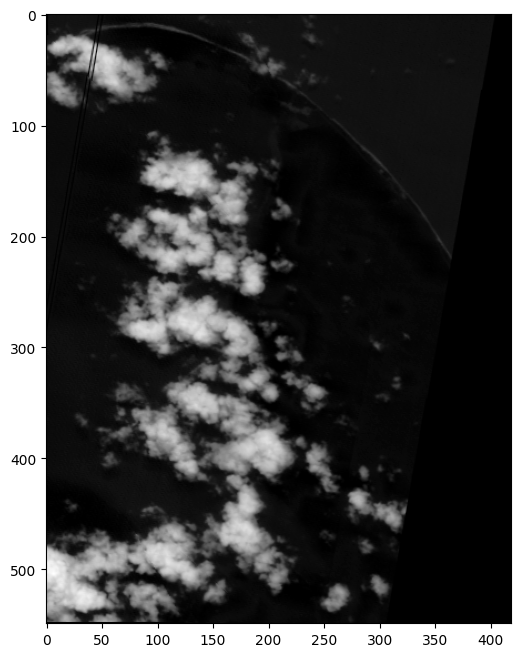

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(6,12))
plt.imshow(img[0], cmap='Greys_r')

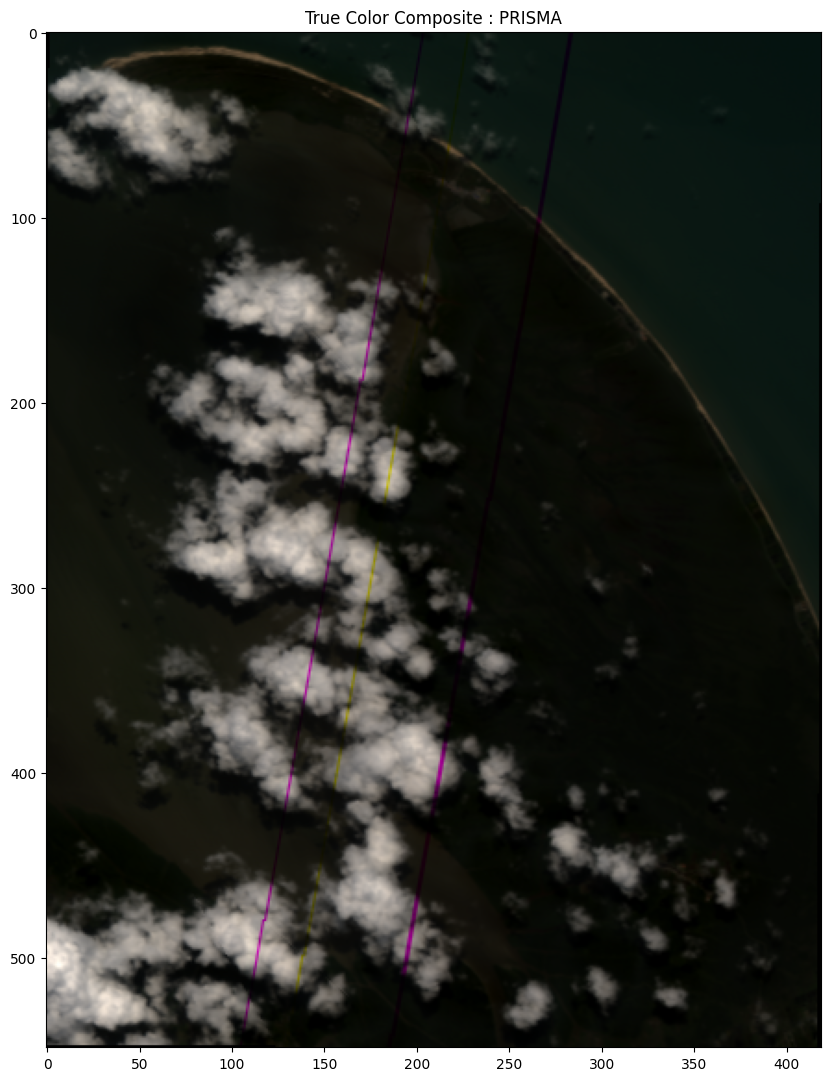

<Axes: title={'center': 'True Color Composite : PRISMA'}>

In [ ]:
from rasterio.plot import show, adjust_band
RGB = img[[28,18,8],:,:]
RGB_norm = adjust_band(RGB)

fig,ax = plt.subplots(1,1, figsize=(10,25))
ax.set_title('True Color Composite : PRISMA')
show( RGB_norm )

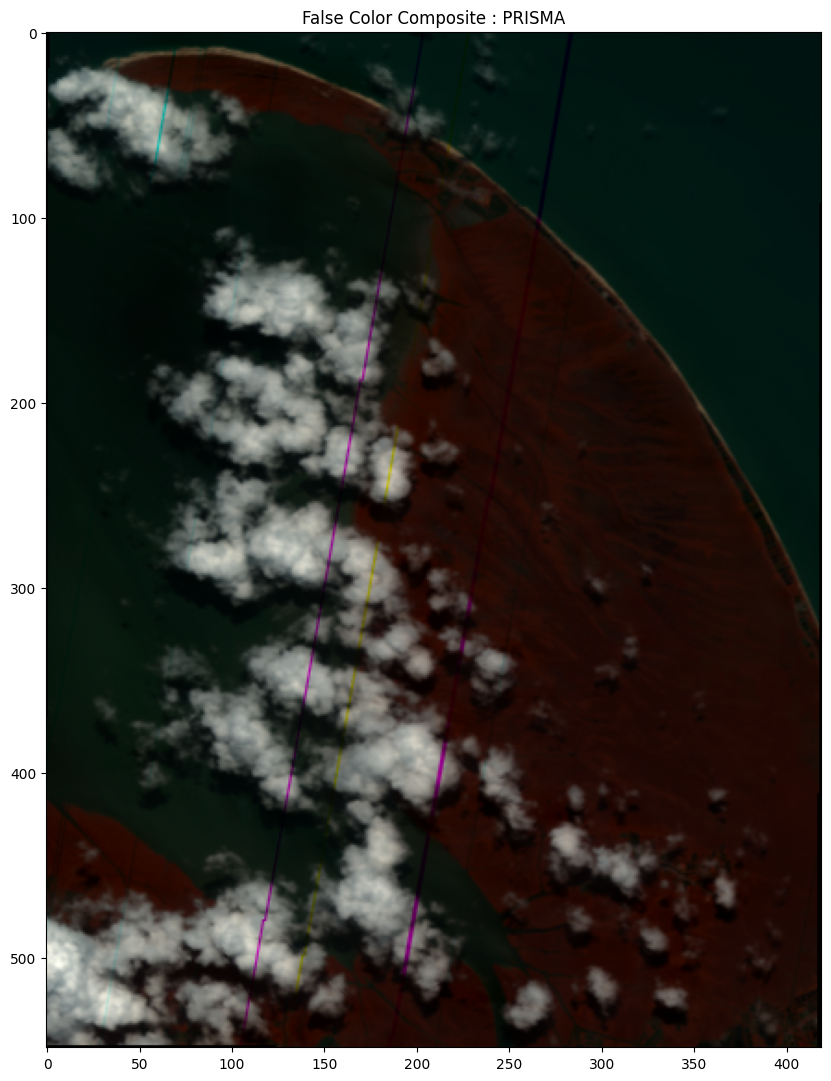

<Axes: title={'center': 'False Color Composite : PRISMA'}>

In [ ]:
from rasterio.plot import show, adjust_band
RGB = img[[38,18,8],:,:]
RGB_norm = adjust_band(RGB)

fig,ax = plt.subplots(1,1, figsize=(10,25))
ax.set_title('False Color Composite : PRISMA')
show( RGB_norm )

In [ ]:
NDVI

array([[           nan,            nan, 2.30678090e+01, ...,
                   nan,            nan,            nan],
       [           nan,            nan, 2.31603221e+01, ...,
        4.40742779e+01, 4.49271198e+01, 4.59469914e+01],
       [           nan,            nan, 2.31724138e+01, ...,
        4.48307692e+01, 4.53493635e+01, 4.53821656e+01],
       ...,
       [4.04016025e-02, 2.48879016e-02, 1.75754108e-02, ...,
        8.80238871e+00,            nan,            nan],
       [1.09548539e-02, 2.09882769e+00, 2.03370226e+00, ...,
        1.10572784e+01,            nan,            nan],
       [           nan,            nan,            nan, ...,
        4.59833795e-01,            nan,            nan]])

<ipython-input-121-1f46c61d4ea3>:6: RuntimeWarning: invalid value encountered in divide
  NDVI = (NIR.astype(float) - Red.astype(float))/(NIR.astype(float) + Red.astype(float))


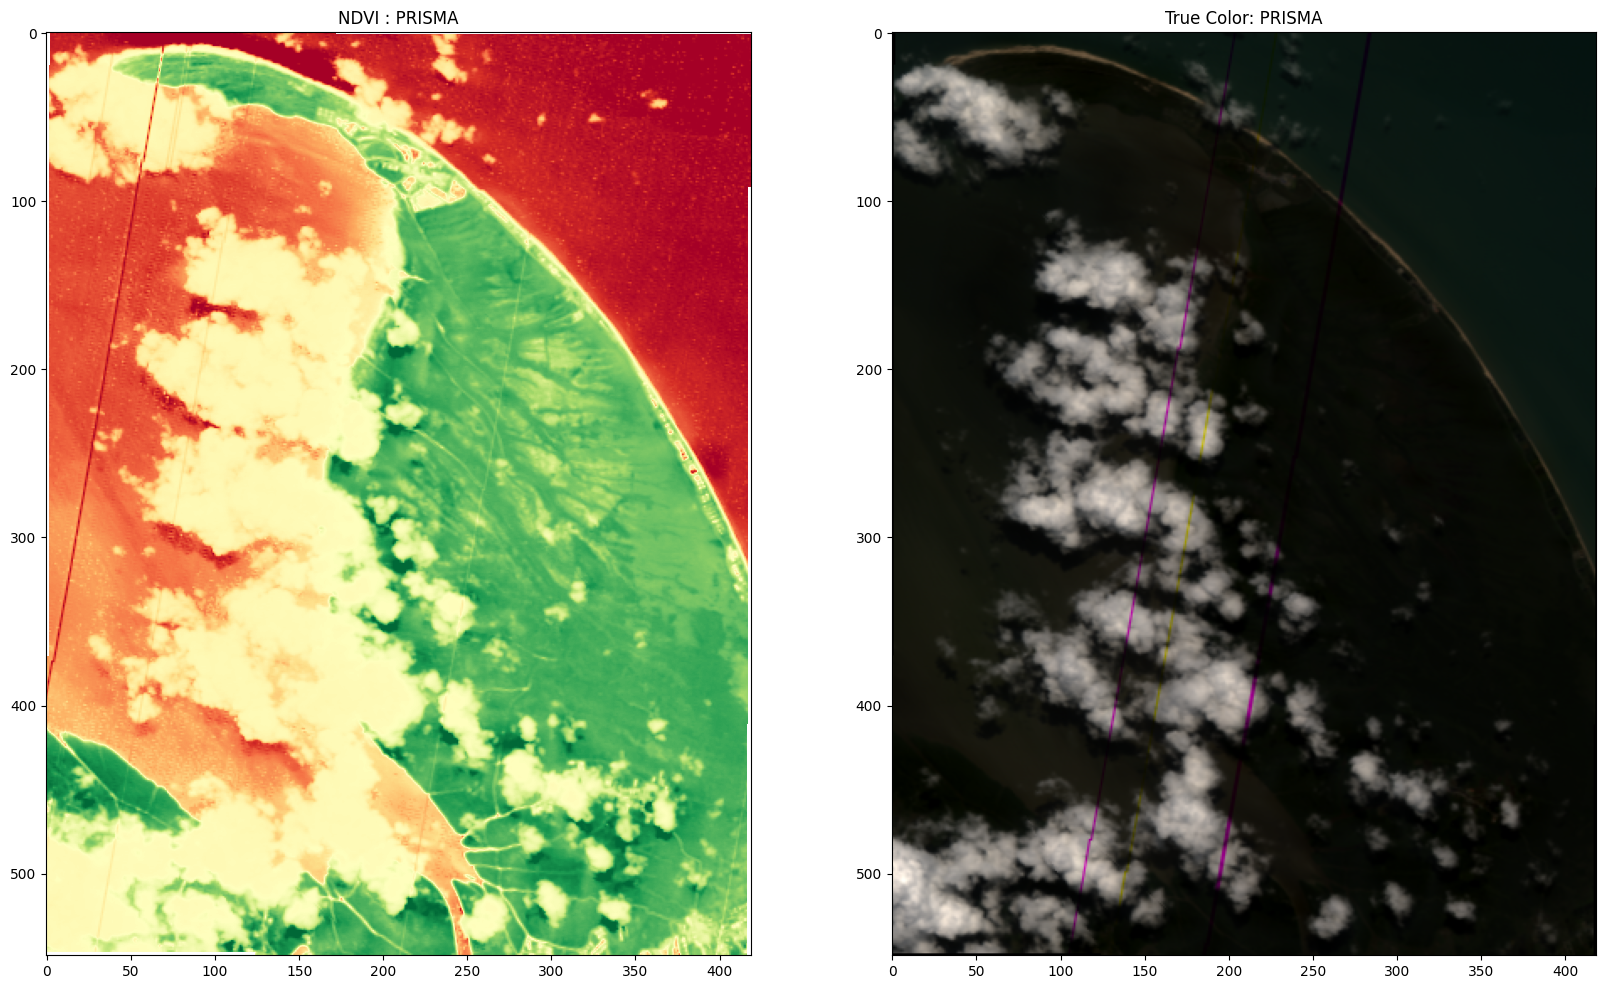

<Axes: title={'center': 'True Color: PRISMA'}>

In [ ]:
RGB = img[[28,18,8],:,:]
RGB_norm = adjust_band(RGB)

Red = img[28]
NIR = img[38]
NDVI = (NIR.astype(float) - Red.astype(float))/(NIR.astype(float) + Red.astype(float))
NDVI_norm = adjust_band( NDVI )
fig,ax = plt.subplots(1,2, figsize=(20,40))
ax[0].set_title('NDVI : PRISMA')
ax[0].imshow( NDVI, cmap='RdYlGn' )

ax[1].set_title('True Color: PRISMA')
show( RGB_norm  )

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('prisma_MIST.csv')
df

X         Y  Class
0    100.169192  8.456421      1
1    100.151200  8.454033      1
2    100.151199  8.453761      1
3    100.151470  8.453218      1
4    100.150652  8.452949      1
..          ...       ...    ...
291  100.185246  8.449047      5
292  100.185518  8.448775      5
293  100.183883  8.448780      5
294  100.184428  8.448779      5
295  100.185517  8.448504      5

[296 rows x 3 columns]

In [ ]:
def SamRasval( x, y ) :
  print(x)
  print(y)
  for val in linzy.sample( ([x,y]) ):
    print( val )

In [ ]:
dfx = df.iloc[0:4]

In [ ]:
dfx

X         Y  Class
0  100.169192  8.456421      1
1  100.151200  8.454033      1
2  100.151199  8.453761      1
3  100.151470  8.453218      1

In [ ]:
df['value'] = [ x for x in linzy.sample( [(x,y) for x,y in zip(df.X, df.Y)] ) ]
df

X         Y  Class  \
0    100.169192  8.456421      1   
1    100.151200  8.454033      1   
2    100.151199  8.453761      1   
3    100.151470  8.453218      1   
4    100.150652  8.452949      1   
..          ...       ...    ...   
291  100.185246  8.449047      5   
292  100.185518  8.448775      5   
293  100.183883  8.448780      5   
294  100.184428  8.448779      5   
295  100.185517  8.448504      5   

                                                 value  
0    [1636, 669, 788, 937, 916, 841, 1138, 1095, 12...  
1    [1486, 348, 381, 1107, 705, 643, 1053, 983, 41...  
2    [1201, 804, 368, 821, 852, 730, 1128, 903, 312...  
3    [1576, 852, 615, 564, 768, 682, 1002, 885, 878...  
4    [1810, 693, 579, 865, 829, 743, 1189, 1044, 11...  
..                                                 ...  
291  [1785, 925, 982, 1375, 1116, 888, 1311, 1235, ...  
292  [1635, 889, 956, 1212, 1070, 854, 1195, 1201, ...  
293  [2105, 1104, 1192, 1380, 1305, 1147, 1462, 145...  
294  [1922, 1049, 1120, 1288, 1199, 1200, 1354, 133...  
295  [1624, 778, 817, 1098, 999, 875, 1111, 1125, 1...  

[296 rows x 4 columns]

In [ ]:
df.loc[df.Class == 5]

X         Y  Class  \
220  100.179622  8.481350      5   
221  100.172533  8.480015      5   
222  100.189895  8.454459      5   
223  100.189620  8.453646      5   
224  100.190164  8.453373      5   
..          ...       ...    ...   
291  100.185246  8.449047      5   
292  100.185518  8.448775      5   
293  100.183883  8.448780      5   
294  100.184428  8.448779      5   
295  100.185517  8.448504      5   

                                                 value  
220  [1088, 334, 344, 786, 525, 477, 816, 856, 899,...  
221  [1472, 770, 897, 1119, 1150, 1015, 1310, 1265,...  
222  [1701, 782, 1217, 1261, 1180, 1016, 1285, 1301...  
223  [1713, 908, 628, 976, 899, 615, 1026, 1096, 11...  
224  [1529, 1035, 1003, 1077, 972, 978, 1322, 1189,...  
..                                                 ...  
291  [1785, 925, 982, 1375, 1116, 888, 1311, 1235, ...  
292  [1635, 889, 956, 1212, 1070, 854, 1195, 1201, ...  
293  [2105, 1104, 1192, 1380, 1305, 1147, 1462, 145...  
294  [1922, 1049, 1120, 1288, 1199, 1200, 1354, 133...  
295  [1624, 778, 817, 1098, 999, 875, 1111, 1125, 1...  

[76 rows x 4 columns]

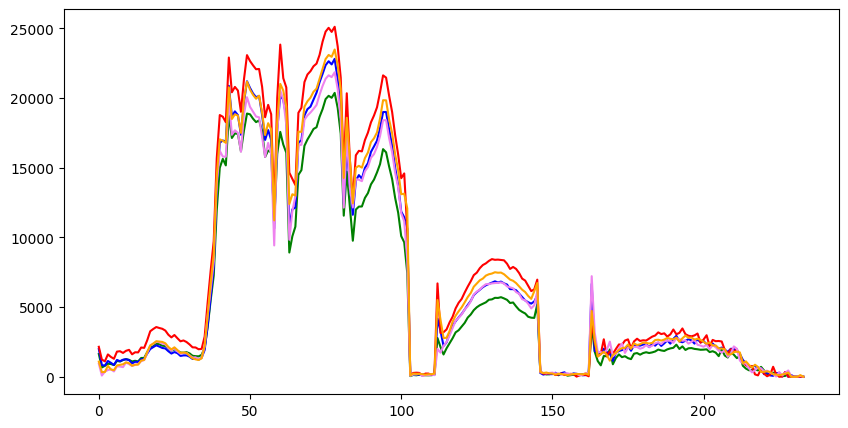

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot( ( df.iloc[0] ).value , color='green')
ax.plot( ( df.iloc[62] ).value , color='blue' )
ax.plot( ( df.iloc[84] ).value , color='red' )
ax.plot( ( df.iloc[172] ).value , color='violet' )
ax.plot( ( df.iloc[220] ).value , color='orange' )


In [ ]:
x = df.value
y = df.Class

In [ ]:
len( list(df.value[0]) )

234

In [ ]:
mycol = [i for i in range(234) ]
df[ mycol ] = [x for x in list( df.value )]

In [ ]:
df

X         Y  Class  \
0    100.169192  8.456421      1   
1    100.151200  8.454033      1   
2    100.151199  8.453761      1   
3    100.151470  8.453218      1   
4    100.150652  8.452949      1   
..          ...       ...    ...   
291  100.185246  8.449047      5   
292  100.185518  8.448775      5   
293  100.183883  8.448780      5   
294  100.184428  8.448779      5   
295  100.185517  8.448504      5   

                                                 value     0     1     2  \
0    [1636, 669, 788, 937, 916, 841, 1138, 1095, 12...  1636   669   788   
1    [1486, 348, 381, 1107, 705, 643, 1053, 983, 41...  1486   348   381   
2    [1201, 804, 368, 821, 852, 730, 1128, 903, 312...  1201   804   368   
3    [1576, 852, 615, 564, 768, 682, 1002, 885, 878...  1576   852   615   
4    [1810, 693, 579, 865, 829, 743, 1189, 1044, 11...  1810   693   579   
..                                                 ...   ...   ...   ...   
291  [1785, 925, 982, 1375, 1116, 888, 1311, 1235, ...  1785   925   982   
292  [1635, 889, 956, 1212, 1070, 854, 1195, 1201, ...  1635   889   956   
293  [2105, 1104, 1192, 1380, 1305, 1147, 1462, 145...  2105  1104  1192   
294  [1922, 1049, 1120, 1288, 1199, 1200, 1354, 133...  1922  1049  1120   
295  [1624, 778, 817, 1098, 999, 875, 1111, 1125, 1...  1624   778   817   

        3     4     5  ...  224  225  226  227  228  229  230  231  232  233  
0     937   916   841  ...  228  114   43   63  218    1    4    8    1    1  
1    1107   705   643  ...  441  163   44  364    3   43   47    1    1    2  
2     821   852   730  ...   40   24   83    1   39  375  144    1    1   29  
3     564   768   682  ...  125  213    5   74    1   53    1    1    1   54  
4     865   829   743  ...  146  134    9   43   68    1    1    1   59    1  
..    ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
291  1375  1116   888  ...  200  345   91  329   38   72    1  138    1   87  
292  1212  1070   854  ...  204  162   11   22  167    9  107    1   11    1  
293  1380  1305  1147  ...   98  296  196   53  268   63  202  367  318    1  
294  1288  1199  1200  ...  508   20  212  104  302  132  418  191  363  972  
295  1098   999   875  ...  316  134  177  255  224   14   68    1   13    1  

[296 rows x 238 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [ ]:
clf = RandomForestClassifier()

In [ ]:
x = df[ mycol ]
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, y,
                                                     test_size=0.5,
                                                    random_state=42)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_true = y_test.to_numpy()
y_true

array([5, 3, 3, 2, 5, 1, 1, 5, 5, 3, 3, 4, 1, 4, 5, 1, 1, 5, 5, 3, 3, 3,
       3, 3, 3, 1, 5, 5, 3, 4, 4, 1, 5, 4, 4, 2, 4, 3, 5, 4, 4, 4, 4, 3,
       1, 5, 1, 2, 1, 4, 3, 3, 1, 1, 5, 1, 1, 3, 3, 3, 2, 1, 4, 4, 4, 3,
       2, 5, 2, 4, 3, 2, 1, 3, 2, 3, 2, 1, 1, 3, 2, 3, 1, 1, 5, 3, 5, 2,
       3, 2, 5, 3, 3, 5, 4, 1, 4, 3, 3, 3, 5, 3, 4, 3, 5, 4, 1, 5, 3, 5,
       1, 4, 5, 1, 3, 3, 3, 5, 3, 5, 3, 1, 3, 5, 2, 4, 4, 5, 5, 3, 5, 1,
       3, 4, 3, 3, 4, 5, 3, 2, 1, 2, 5, 3, 5, 3, 5, 4])

In [ ]:
y_pred

array([5, 3, 1, 1, 5, 5, 1, 5, 5, 3, 3, 4, 1, 5, 5, 1, 1, 5, 5, 3, 3, 3,
       3, 3, 3, 1, 5, 5, 3, 4, 4, 5, 3, 4, 1, 2, 4, 3, 5, 4, 4, 4, 1, 3,
       1, 5, 1, 1, 4, 4, 3, 3, 1, 1, 5, 1, 1, 3, 3, 3, 3, 5, 4, 1, 4, 3,
       1, 5, 1, 4, 3, 1, 1, 3, 1, 3, 5, 5, 1, 3, 1, 3, 1, 1, 5, 3, 5, 1,
       3, 1, 5, 3, 3, 5, 4, 5, 5, 3, 3, 3, 5, 3, 4, 3, 5, 4, 5, 5, 3, 5,
       1, 4, 5, 1, 3, 3, 3, 5, 3, 5, 3, 5, 3, 1, 1, 1, 4, 5, 5, 3, 5, 1,
       3, 4, 3, 3, 1, 5, 3, 5, 1, 1, 5, 3, 5, 3, 5, 4])

In [ ]:
confusion_matrix(y_true, y_pred)

array([[19,  0,  0,  1,  7],
       [11,  1,  1,  0,  2],
       [ 1,  0, 46,  0,  0],
       [ 5,  0,  0, 19,  2],
       [ 1,  0,  1,  0, 31]])

In [ ]:
print( classification_report(y_true, y_pred) )

              precision    recall  f1-score   support

           1       0.51      0.70      0.59        27
           2       1.00      0.07      0.12        15
           3       0.96      0.98      0.97        47
           4       0.95      0.73      0.83        26
           5       0.74      0.94      0.83        33

    accuracy                           0.78       148
   macro avg       0.83      0.68      0.67       148
weighted avg       0.83      0.78      0.76       148



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {#'bootstrap': [True, False],
              #'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             verbose=2)

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
y_true = y_test.to_numpy()
y_true

array([5, 3, 3, 2, 5, 1, 1, 5, 5, 3, 3, 4, 1, 4, 5, 1, 1, 5, 5, 3, 3, 3,
       3, 3, 3, 1, 5, 5, 3, 4, 4, 1, 5, 4, 4, 2, 4, 3, 5, 4, 4, 4, 4, 3,
       1, 5, 1, 2, 1, 4, 3, 3, 1, 1, 5, 1, 1, 3, 3, 3, 2, 1, 4, 4, 4, 3,
       2, 5, 2, 4, 3, 2, 1, 3, 2, 3, 2, 1, 1, 3, 2, 3, 1, 1, 5, 3, 5, 2,
       3, 2, 5, 3, 3, 5, 4, 1, 4, 3, 3, 3, 5, 3, 4, 3, 5, 4, 1, 5, 3, 5,
       1, 4, 5, 1, 3, 3, 3, 5, 3, 5, 3, 1, 3, 5, 2, 4, 4, 5, 5, 3, 5, 1,
       3, 4, 3, 3, 4, 5, 3, 2, 1, 2, 5, 3, 5, 3, 5, 4])

In [ ]:
y_pred

array([5, 3, 1, 1, 5, 5, 4, 5, 5, 3, 3, 4, 1, 5, 5, 1, 1, 5, 5, 3, 3, 3,
       3, 3, 3, 1, 5, 5, 3, 4, 4, 5, 3, 4, 1, 2, 4, 3, 5, 4, 4, 4, 1, 3,
       1, 5, 1, 1, 4, 4, 3, 3, 1, 1, 5, 1, 1, 3, 3, 3, 3, 5, 4, 1, 4, 3,
       1, 5, 1, 4, 3, 1, 1, 3, 1, 3, 5, 5, 1, 3, 1, 3, 1, 1, 5, 3, 5, 1,
       3, 1, 5, 3, 3, 3, 4, 5, 5, 3, 3, 3, 5, 3, 4, 3, 5, 4, 5, 5, 3, 5,
       1, 4, 5, 1, 3, 3, 3, 5, 3, 5, 3, 5, 3, 5, 1, 1, 4, 5, 5, 3, 5, 1,
       3, 4, 3, 3, 1, 5, 3, 5, 1, 1, 5, 3, 5, 3, 5, 4])

In [ ]:
confusion_matrix(y_true, y_pred)

array([[18,  0,  0,  2,  7],
       [11,  1,  1,  0,  2],
       [ 1,  0, 46,  0,  0],
       [ 5,  0,  0, 19,  2],
       [ 0,  0,  2,  0, 31]])

In [ ]:
dfx = df.copy()

In [ ]:
dfx['Class'].value_counts()

3    88
5    76
1    62
4    48
2    22
Name: Class, dtype: int64

In [ ]:
dfx = dfx.loc[dfx['Class'] != 2]

In [ ]:
x_pang = dfx[mycol]
y_pang = dfx['Class']

XX_train, XX_test, yy_train, yy_test = train_test_split(x_pang, y_pang,
                                                     test_size=0.5,
                                                    random_state=42)

In [ ]:
clfpang = RandomForestClassifier()
clfpang.fit(XX_train, yy_train)

RandomForestClassifier()

In [ ]:
yy_pred = clfpang.predict(XX_test)

In [ ]:
yy_true = yy_test.to_numpy()
yy_true

array([1, 4, 4, 3, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 4, 3, 5, 1, 3, 5, 1, 3,
       4, 5, 5, 5, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 5, 5, 1, 3, 1, 3, 3, 1,
       3, 5, 1, 5, 3, 5, 3, 4, 4, 1, 4, 1, 5, 3, 1, 4, 3, 3, 1, 3, 1, 5,
       5, 3, 5, 3, 3, 4, 4, 3, 1, 5, 5, 3, 3, 3, 1, 3, 5, 1, 4, 5, 1, 3,
       4, 5, 1, 5, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       4, 5, 3, 4, 1, 5, 4, 5, 3, 3, 1, 3, 1, 4, 4, 3, 3, 4, 3, 4, 1, 1,
       1, 5, 3, 1, 3])

In [ ]:
yy_pred

array([1, 4, 4, 3, 5, 5, 5, 5, 5, 5, 3, 4, 5, 5, 1, 3, 3, 1, 3, 5, 1, 3,
       1, 5, 1, 5, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 5, 5, 4, 3, 1, 3, 3, 1,
       3, 5, 1, 1, 5, 5, 3, 4, 4, 1, 4, 1, 5, 3, 5, 4, 3, 3, 1, 3, 1, 5,
       5, 3, 3, 1, 3, 4, 4, 3, 1, 5, 3, 3, 3, 3, 1, 3, 5, 1, 4, 5, 1, 3,
       4, 5, 5, 5, 3, 4, 5, 5, 4, 3, 5, 3, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       4, 5, 3, 4, 1, 5, 5, 5, 3, 3, 1, 3, 1, 4, 1, 1, 3, 5, 3, 4, 1, 1,
       1, 5, 3, 1, 3])

In [ ]:
confusion_matrix(yy_true, yy_pred)

array([[26,  0,  1,  2],
       [ 2, 46,  1,  1],
       [ 3,  0, 17,  3],
       [ 2,  4,  0, 29]])

In [ ]:
print( classification_report(yy_true, yy_pred) )

              precision    recall  f1-score   support

           1       0.79      0.90      0.84        29
           3       0.92      0.92      0.92        50
           4       0.89      0.74      0.81        23
           5       0.83      0.83      0.83        35

    accuracy                           0.86       137
   macro avg       0.86      0.85      0.85       137
weighted avg       0.86      0.86      0.86       137



In [ ]:
import pickle
pickle.dump(clfpang, open('RFC_lnwpang.pkl','wb') )

In [ ]:
loaded_model = pickle.load(open('RFC_lnwpang.pkl', 'rb'))

In [ ]:
loaded_model.predict(XX_train)

array([5, 4, 1, 5, 4, 3, 1, 5, 3, 5, 1, 5, 3, 5, 5, 3, 1, 1, 4, 4, 4, 1,
       5, 5, 1, 4, 1, 3, 1, 4, 4, 4, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3, 1, 5,
       4, 1, 3, 4, 1, 5, 5, 3, 1, 4, 5, 1, 3, 5, 5, 4, 1, 3, 4, 5, 1, 3,
       1, 3, 1, 5, 3, 1, 4, 3, 5, 1, 5, 1, 4, 5, 5, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 5, 3, 1, 4, 3, 5, 3, 5, 5, 5, 3, 1, 3, 1, 5, 4, 5, 4, 1, 5,
       4, 5, 4, 1, 5, 1, 3, 5, 5, 1, 4, 4, 5, 3, 3, 4, 3, 3, 5, 3, 5, 1,
       4, 3, 3, 5, 3])

In [ ]:
old_image = '/content/prisma_talumpuk4326.tif'
new_image = '/content/pang_tiktokgirl.tif'

In [ ]:
with rio.open(old_image,'r') as src:
  profile = src.profile
  profile.update( dtype=rio.uint8, count=1 )
  # row shape0, col shape1
  print(src.shape[0], src.shape[1])
  with rio.open(new_image, 'w', **profile) as dst:
    data = src.read()
    print( data.shape )
    img_swp = np.moveaxis(data, 0, 2 )
    print( img_swp.shape )
    img_flat = img_swp.reshape(-1, img_swp.shape[-1])
    print( img_flat.shape )
    img_preds = loaded_model.predict(img_flat)
    print( img_preds )
    print( img_preds.shape )

    output = img_preds.reshape(*img_swp.shape[:-1])
    dst.write( output.astype(rio.uint8) , 1)

549 419
(234, 549, 419)
(549, 419, 234)
(230031, 234)
[1 1 1 ... 3 1 1]
(230031,)


In [ ]:
out = rio.open(new_image)

In [ ]:
pang_img = out.read()

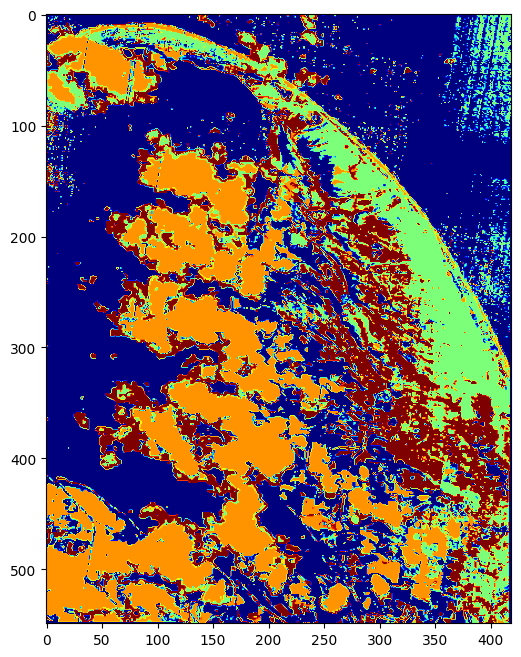

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(6,12))
plt.imshow(pang_img[0], cmap='jet')